#Menyiapkan data

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("data.csv")
data.head()

,Usia,Jenis Kelamin,Pendidikan Terakhir,Pekerjaan,Tambah Polis,Loyalitas
0,28,laki-laki,UNIVERITAS,PETANI,tidak,tidak loyal
1,26,laki-laki,KEJURUSAN,PROFESIONAL,ya,tidak loyal
2,29,perempuan,UNIVERITAS,WIRASWASTA,ya,loyal
3,27,laki-laki,UNIVERITAS,PEGAWAI,tidak,tidak loyal
4,30,perempuan,KEJURUSAN,WIRASWASTA,ya,loyal


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Usia                 128 non-null    int64 
 1   Jenis Kelamin        128 non-null    object
 2   Pendidikan Terakhir  128 non-null    object
 3   Pekerjaan            128 non-null    object
 4   Tambah Polis         128 non-null    object
 5   Loyalitas            128 non-null    object
dtypes: int64(1), object(5)
memory usage: 6.1+ KB


#Pre Processing data

In [4]:
data.drop_duplicates(inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97 entries, 0 to 127
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Usia                 97 non-null     int64 
 1   Jenis Kelamin        97 non-null     object
 2   Pendidikan Terakhir  97 non-null     object
 3   Pekerjaan            97 non-null     object
 4   Tambah Polis         97 non-null     object
 5   Loyalitas            97 non-null     object
dtypes: int64(1), object(5)
memory usage: 5.3+ KB


In [6]:
data.loc[data["Jenis Kelamin"] == "laki-laki", 'Jenis Kelamin'] = 0
data.loc[data["Jenis Kelamin"] == "perempuan", 'Jenis Kelamin'] = 1

data.loc[data["Tambah Polis"] == "tidak", 'Tambah Polis'] = 0
data.loc[data["Tambah Polis"] == "ya", 'Tambah Polis'] = 1

data.loc[data["Loyalitas"] == "tidak loyal", 'Loyalitas'] = 0
data.loc[data["Loyalitas"] == "loyal", 'Loyalitas'] = 1

In [7]:
dummies = pd.get_dummies(data["Pendidikan Terakhir"], prefix='Pendidikan')
data = pd.concat([data, dummies], axis=1)
data.drop("Pendidikan Terakhir", axis=1, inplace=True)

dummies = pd.get_dummies(data["Pekerjaan"], prefix='Pekerjaan')
data = pd.concat([data, dummies], axis=1)
data.drop("Pekerjaan", axis=1, inplace=True)

In [8]:
data.head()

,Usia,Jenis Kelamin,Tambah Polis,Loyalitas,Pendidikan_KEJURUSAN,Pendidikan_SMU,Pendidikan_UNIVERITAS,Pekerjaan_PEGAWAI,Pekerjaan_PETANI,Pekerjaan_PROFESIONAL,Pekerjaan_WIRASWASTA
0,28,0,0,0,0,0,1,0,1,0,0
1,26,0,1,0,1,0,0,0,0,1,0
2,29,1,1,1,0,0,1,0,0,0,1
3,27,0,0,0,0,0,1,1,0,0,0
4,30,1,1,1,1,0,0,0,0,0,1


In [9]:
# Variabel independen
x = data.drop("Loyalitas", axis=1)

x.head()

,Usia,Jenis Kelamin,Tambah Polis,Pendidikan_KEJURUSAN,Pendidikan_SMU,Pendidikan_UNIVERITAS,Pekerjaan_PEGAWAI,Pekerjaan_PETANI,Pekerjaan_PROFESIONAL,Pekerjaan_WIRASWASTA
0,28,0,0,0,0,1,0,1,0,0
1,26,0,1,1,0,0,0,0,1,0
2,29,1,1,0,0,1,0,0,0,1
3,27,0,0,0,0,1,1,0,0,0
4,30,1,1,1,0,0,0,0,0,1


In [10]:
# Variabel dependen
y = data["Loyalitas"]
y=y.astype('int')
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Loyalitas, dtype: int64

# Train size 80%, Test size 20%

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)

akurasi = []

for i in range(3, 6):
  clf = DecisionTreeClassifier(max_depth = i, random_state=2)
  clf = clf.fit(x_train,y_train)
  y_pred = clf.predict(x_test)
  akurasi.append(metrics.accuracy_score(y_test, y_pred))
  print()

akurasi

[0.75, 0.55, 0.45]

# Train size 70%, Test size 30%

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 123)

akurasi = []

for i in range(3, 6):
  clf = DecisionTreeClassifier(max_depth = i, random_state=2)
  clf = clf.fit(x_train,y_train)
  y_pred = clf.predict(x_test)
  akurasi.append(metrics.accuracy_score(y_test, y_pred))

akurasi

[0.7333333333333333, 0.7, 0.5333333333333333]

# Train size 40%, Test size 60%

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 123)

akurasi = []

for i in range(3, 6):
  clf = DecisionTreeClassifier(max_depth = i, random_state=2)
  clf = clf.fit(x_train,y_train)
  y_pred = clf.predict(x_test)
  akurasi.append(metrics.accuracy_score(y_test, y_pred))

akurasi

[0.6666666666666666, 0.6410256410256411, 0.5897435897435898]

#Confusion Matrix

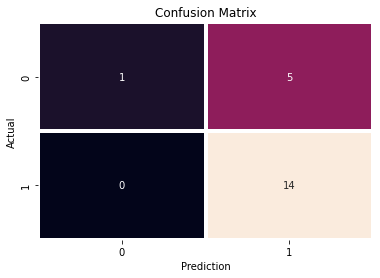

In [14]:
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)

clf = DecisionTreeClassifier(max_depth = 3, random_state=2)
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

# Membuat funsi untuk menampilkan confusion matrix dengan seaborn dan matplotlib
def display_conf(y_test,prediction):
    sns.heatmap(confusion_matrix(y_test,prediction),annot=True,linewidths=3,cbar=False)
    plt.title('Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Prediction')
    plt.show()

# Memanggil fungsi untuk menampilkan visualisasi confusion matrix
display_conf(y_test, y_pred)

#Pohon keputusan

In [15]:
#import relevant functions
from sklearn.tree import export_text
#export the decision rules
feature_names = list(data.columns)
feature_names.remove('Loyalitas')
tree_rules = export_text(clf, feature_names = feature_names)
#print the result
print(tree_rules)

|--- Pendidikan_UNIVERITAS <= 0.50
|   |--- Usia <= 27.50
|   |   |--- class: 0
|   |--- Usia >  27.50
|   |   |--- Tambah Polis <= 0.50
|   |   |   |--- class: 0
|   |   |--- Tambah Polis >  0.50
|   |   |   |--- class: 1
|--- Pendidikan_UNIVERITAS >  0.50
|   |--- Pekerjaan_WIRASWASTA <= 0.50
|   |   |--- Tambah Polis <= 0.50
|   |   |   |--- class: 1
|   |   |--- Tambah Polis >  0.50
|   |   |   |--- class: 1
|   |--- Pekerjaan_WIRASWASTA >  0.50
|   |   |--- class: 1

